0.3568758156992396


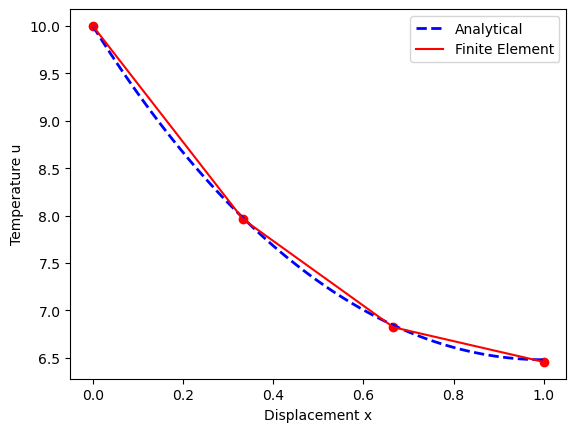

In [1]:
#ref:https://qiita.com/shushin/items/1a7ecf1ffc377cdf6247
import numpy as np

def calc_analytical(x, u0):
    #解析解を求める
    return u0 * np.cosh(1 - x) / np.cosh(1)
def element_matrix(h):
    res = np.array([[2 * (h ** 2 + 3), h ** 2 - 6],
                    [h ** 2 - 6 , 2 * (h ** 2 + 3)]])
    return res / (6 * h)

def finite_element(s_mum, u0):
    h = 1 / s_mum
    
    #行列K(n_num*n_num)
    matrix = np.zeros([s_mum + 1, s_mum + 1])
    for i in range(s_mum):
        matrix[i:(i+2),i:(i+2)] += element_matrix(h)
    
    #行列X(s_num*1)を作成
    matrix_u0 = np.zeros([s_mum, 1])
    matrix_u0[0] = -u0 * matrix[1, 0]

    #逆行列を用いて変位行列Uを計算
    res_u = np.dot(np.linalg.inv(matrix[1:, 1:]), matrix_u0)
    return np.append(u0, res_u.flatten())
import matplotlib.pyplot as plt

S_Num = 3 #分割数
U0 = 10. #境界条件

#有限要素法
x_finite = np.linspace(0, 1, S_Num + 1)
res_finite = finite_element(S_Num, U0)

#解析解
x_analytical = np.linspace(0, 1, 100)
res_analytical = calc_analytical(x_analytical, U0)

#x=1(ノイマン境界における相対誤差(%))
print(100 * np.abs(res_finite[-1] - res_analytical[-1])/res_analytical[-1])

#matplotlibで可視化
plt.plot(x_analytical, res_analytical, c="blue", 
        linestyle="dashed", linewidth=2, label="Analytical")
plt.scatter(x_finite, res_finite, c="red")
plt.plot(x_finite, res_finite, c="red", label="Finite Element")
plt.xlabel("Displacement x")
plt.ylabel("Temperature u")
plt.legend()
plt.show()
